## Mini-Project 4:  Solving n-queens Problem using Evolutionary Computation

#### CSC 180  Intelligent Systems (Fall 2019)

#### Dr. Haiquan Chen, California State University, Sacramento




In [315]:
# Derrek Gass (219615449)
# Alexander Lee (212490812)
# CSC180 - Intelligent Systems
# Mini-Project 4
# 11-14-19


## Part I: Position-index-based board representation

In [316]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


/Users/derrekgass/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/derrekgass/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [317]:
def create_individual():
    return random.sample(range(64), 8)

In [318]:
print(create_individual())

[19, 62, 50, 18, 4, 24, 8, 16]


In [319]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1
    
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [320]:
toolbox = base.Toolbox()
toolbox.register("attr_int", )
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [321]:
pop = toolbox.population(n=50)

In [322]:
show_grid(pop[0])

-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|X|-|-|-|X|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|X|-|X|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------


In [323]:
for i in range(len(pop)):
    print(pop[i])

[14, 53, 39, 21, 30, 62, 35, 51]
[8, 19, 63, 46, 53, 27, 48, 11]
[23, 32, 39, 16, 5, 33, 63, 59]
[8, 43, 61, 21, 34, 30, 24, 22]
[33, 37, 61, 14, 49, 39, 9, 22]
[40, 54, 55, 63, 31, 25, 48, 14]
[46, 59, 39, 35, 42, 52, 32, 17]
[42, 38, 26, 58, 13, 25, 62, 22]
[30, 50, 49, 53, 56, 0, 29, 11]
[55, 46, 21, 25, 31, 58, 60, 51]
[25, 35, 42, 55, 61, 51, 0, 26]
[38, 31, 8, 28, 24, 34, 48, 56]
[36, 38, 2, 0, 37, 24, 9, 55]
[5, 3, 51, 19, 28, 4, 17, 50]
[45, 3, 6, 28, 33, 8, 52, 44]
[33, 1, 3, 12, 22, 43, 17, 42]
[14, 16, 47, 10, 38, 23, 32, 4]
[23, 20, 60, 22, 50, 0, 5, 54]
[44, 40, 6, 38, 19, 15, 18, 48]
[49, 35, 53, 27, 28, 24, 7, 30]
[62, 15, 44, 22, 63, 12, 26, 3]
[1, 33, 44, 11, 56, 9, 51, 42]
[42, 10, 23, 14, 43, 54, 59, 57]
[5, 7, 45, 58, 16, 46, 30, 1]
[51, 53, 0, 48, 1, 9, 32, 30]
[49, 36, 24, 18, 14, 42, 58, 59]
[13, 2, 25, 3, 19, 43, 22, 35]
[51, 11, 55, 18, 50, 48, 13, 59]
[63, 1, 41, 36, 7, 42, 43, 15]
[43, 11, 13, 36, 33, 15, 27, 60]
[43, 23, 51, 7, 30, 27, 55, 2]
[43, 48, 62, 47

### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board and add that function to the fitness value. 

-  evaFitness() returns the total number of duplicate position pair plus the total number of distinct pairs of queens that attack each other.  

In [353]:
#fitness function
def evaFitness(individual):
    conflict = 0
    conflict += checkDuplicate(individual)
    conflict += checkLeftDiagConflict(individual)
    #conflict += checkRightDiagConflict(individual)
    conflict += checkVertConflict(individual)
    conflict += checkHorizConflict(individual)
    return (conflict),
    
    
# Calculate the number of queens in left diagonal conflict
def checkRightDiagConflict(individual):
    count=0
    seen = set()
    n = 1
    for i in individual:
 #       row = np.floor(i/8)    # rows
 #       col = i % 8            # columns
        if i in seen:
            count+=1
        else:
            n = 1
            seen.add(i)
            while (n < 8):
                j = (i+(n*9))%63  # down to the right
                n+=1   
                seen.add(j)
    return count


# this is the one that no worky
# Calculate the number of queens in right diagonal conflict
def checkLeftDiagConflict(individual):
    count=0
    seen = set()
    for i in individual:
        row = np.floor(i/8)    # rows
        col = i % 8            # columns
        if i in seen:
            count+=1
        else:
            n = 1
            seen.add(i)
            while (n <8):
                j = (i+(n*8)-n)%63  # down to the left
                n+=1   
                seen.add(j)
    return count

 # Calculate the number of queens in left diagonal conflict
def checkVertConflict(individual):
    vertCount=0
    seen = set()
    for i in individual:
        i = i%8
        if i in seen:
            vertCount+=1
        else:
            seen.add(i)
    return vertCount

 # Calculate the number of queens in left diagonal conflict
def checkHorizConflict(individual):
    count=0
    seen = set()
    for i in individual:
        i = np.floor(i/8)
        if i in seen:
            count+=1
        else:
            seen.add(i)
    return count
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0
    uniqueItems = set()
    for i in individual:
        if i in uniqueItems:
            dup += 1
        else:
            uniqueItems.add(i)
    return dup
    
    

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [354]:
toolbox.register("evaluate", evaFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.125)
toolbox.register("select", tools.selTournament, tournsize=3)

In [355]:
ind = toolbox.individual()
print(ind)

toolbox.mutate(ind)
print(ind)

[47, 24, 51, 60, 8, 41, 52, 29]
[47, 24, 51, 60, 8, 41, 52, 29]


In [356]:
print((type(pop), pop))

(<class 'list'>, [[14, 53, 39, 21, 30, 62, 35, 51], [8, 19, 63, 46, 53, 27, 48, 11], [23, 32, 39, 16, 5, 33, 63, 59], [8, 43, 61, 21, 34, 30, 24, 22], [33, 37, 61, 14, 49, 39, 9, 22], [40, 54, 55, 63, 31, 25, 48, 14], [46, 59, 39, 35, 42, 52, 32, 17], [42, 38, 26, 58, 13, 25, 62, 22], [30, 50, 49, 53, 56, 0, 29, 11], [55, 46, 21, 25, 31, 58, 60, 51], [25, 35, 42, 55, 61, 51, 0, 26], [38, 31, 8, 28, 24, 34, 48, 56], [36, 38, 2, 0, 37, 24, 9, 55], [5, 3, 51, 19, 28, 4, 17, 50], [45, 3, 6, 28, 33, 8, 52, 44], [33, 1, 3, 12, 22, 43, 17, 42], [14, 16, 47, 10, 38, 23, 32, 4], [23, 20, 60, 22, 50, 0, 5, 54], [44, 40, 6, 38, 19, 15, 18, 48], [49, 35, 53, 27, 28, 24, 7, 30], [62, 15, 44, 22, 63, 12, 26, 3], [1, 33, 44, 11, 56, 9, 51, 42], [42, 10, 23, 14, 43, 54, 59, 57], [5, 7, 45, 58, 16, 46, 30, 1], [51, 53, 0, 48, 1, 9, 32, 30], [49, 36, 24, 18, 14, 42, 58, 59], [13, 2, 25, 3, 19, 43, 22, 35], [51, 11, 55, 18, 50, 48, 13, 59], [63, 1, 41, 36, 7, 42, 43, 15], [43, 11, 13, 36, 33, 15, 27, 60]

In [357]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [358]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   Run the algorithm for 100 generations. 

In [359]:
import matplotlib.pyplot as plt
%matplotlib inline  

hof = tools.HallOfFame(maxsize=1)

pop, log= algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)



gen	nevals	avg 	min
0  	50    	7.94	5  
1  	35    	7.12	5  
2  	36    	7   	5  
3  	29    	6.52	4  
4  	27    	6.2 	5  
5  	26    	5.84	5  
6  	28    	5.34	4  
7  	28    	5.38	4  
8  	30    	4.98	4  
9  	37    	4.84	4  
10 	31    	4.52	4  
11 	23    	4.08	3  
12 	28    	4.28	3  
13 	28    	3.92	2  
14 	24    	3.8 	2  
15 	32    	3.4 	2  
16 	35    	3   	2  
17 	28    	2.58	2  
18 	27    	2.2 	2  
19 	35    	2.6 	0  
20 	41    	2.3 	0  
21 	33    	1.62	0  
22 	42    	0.98	0  
23 	31    	0.72	0  
24 	24    	0.32	0  
25 	35    	0.3 	0  
26 	26    	0.56	0  
27 	30    	0.54	0  
28 	30    	0.5 	0  
29 	32    	0.38	0  
30 	27    	0.5 	0  
31 	24    	0.16	0  
32 	32    	0.58	0  
33 	32    	0.4 	0  
34 	30    	0.66	0  
35 	30    	0.44	0  
36 	32    	0.78	0  
37 	32    	0.72	0  
38 	22    	0.3 	0  
39 	29    	0.26	0  
40 	35    	0.72	0  
41 	35    	0.2 	0  
42 	28    	0.36	0  
43 	32    	0.48	0  
44 	25    	0.1 	0  
45 	29    	0.58	0  
46 	33    	0.26	0  
47 	32    	0.6 	0  
48 	36    	0.5 	0  


### 5 pts:  Plot the "avg" and "min" for each generation

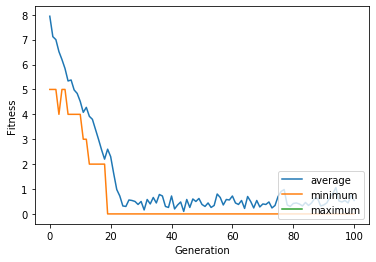

In [360]:
gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")

plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [361]:
best_ind = tools.selBest(pop, k=1)[0]

print('Best individual is:', best_ind)

print('With fitness: ', toolbox.evaluate(best_ind))

show_grid(best_ind)

Best individual is: [49, 36, 24, 13, 6, 42, 19, 63]
With fitness:  (0,)
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------


## Part II: Row-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [ ]:
toolbox.individual()

In [ ]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")


In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

In [ ]:
show_grid(pop[0])

### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [ ]:
#fitness function
def evaFitness(individual):
    
    conflict = 0
    

    
    
    
    
    
    
    
    
    return (conflict,)



    
 
    

### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)



In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)


stats.register("avg", np.mean)
stats.register("min", np.min)



### 10 pts:  Writer your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   Run the algorithm for 100 generations. 

### 5 pts:  Plot the "avg" and "min" for each generation

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  










### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

### Reflection:  Which board representaion is better?   Try different parameter values for mutation and crossover or vary the number of generations you want to go through, and write your findings in the report.     